In [1]:
import requests
import os
import datetime
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import hvplot.pandas
import plotly.express as px
from dotenv import load_dotenv
from panel.interact import interact
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,9)

In [2]:
# Import quarterly rent data
quarter_rent_path=Path("data/quarter_rent_df.csv")
quarter_rent_df=pd.read_csv(quarter_rent_path, index_col=0)
quarter_rent_df

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
2015-Q1,1495.754941,2183.284314,3565.471510,1890.415205,1537.305556
2015-Q2,1499.579710,2226.117647,3546.814282,1934.654971,1606.222222
2015-Q3,1524.159420,2316.440842,3393.259019,2000.231099,1709.625000
2015-Q4,1561.304348,2384.872549,3786.904551,2049.690058,1878.777778
2016-Q1,1587.463768,2388.568627,3892.253333,2065.175439,1879.700000
2016-Q2,1591.536232,2375.490196,3766.184930,2076.321637,1852.885185
2016-Q3,1616.876153,2389.627451,3794.189683,2092.292398,1907.328571
2016-Q4,1681.856522,2422.372549,3817.956349,2117.192982,1962.731481
2017-Q1,1708.661397,2394.774510,3584.146825,2123.643275,1904.018687
2017-Q2,1712.782609,2348.568925,3653.159431,2108.695906,1859.305556


In [3]:
# Import quarterly sales data
quarter_sale_path=Path("data/quarter_sale_df.csv")
quarter_sale_df=pd.read_csv(quarter_sale_path, index_col=0)
quarter_sale_df

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
2015-Q1,7.936697e+05,1.130284e+06,1.866549e+06,535577.169492,433772.444444
2015-Q2,1.132875e+06,9.258300e+05,1.785913e+06,572124.844243,430735.111111
2015-Q3,6.372525e+05,9.741481e+05,1.902829e+06,557428.864407,432843.194444
2015-Q4,8.069360e+05,9.692575e+05,1.756214e+06,611727.891974,432944.777778
2016-Q1,9.134569e+05,9.920667e+05,1.778926e+06,585771.847458,438420.027778
2016-Q2,6.769483e+05,9.757775e+05,2.174441e+06,585371.355932,434230.083333
2016-Q3,6.614433e+05,1.027944e+06,1.938502e+06,625813.118644,475787.055556
2016-Q4,7.621143e+05,1.018279e+06,2.065984e+06,636082.739529,488450.833333
2017-Q1,7.776927e+05,1.022893e+06,1.863706e+06,602400.525424,483276.166667
2017-Q2,7.223921e+05,1.027422e+06,1.837731e+06,691745.971751,527237.555556


In [4]:
# Calculate the correlation between rental prices across boroughs
quarter_rent_correlation=quarter_rent_df.corr()
quarter_rent_correlation

# Rent prices in Manhattan are negatively corrolated with rent prices in the Bronx, Queens and Staten Island and only slightly corrolated to Brooklyn rent prices. 
# Rent prices in the Bronx, Queens and Staten Island are highly corrolated.

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Bronx,1.000000,0.366216,-0.548014,0.891626,0.837897
Brooklyn,0.366216,1.000000,0.392652,0.581873,0.671171
Manhattan,-0.548014,0.392652,1.000000,-0.348909,-0.254617
Queens,0.891626,0.581873,-0.348909,1.000000,0.947908
Staten Island,0.837897,0.671171,-0.254617,0.947908,1.000000


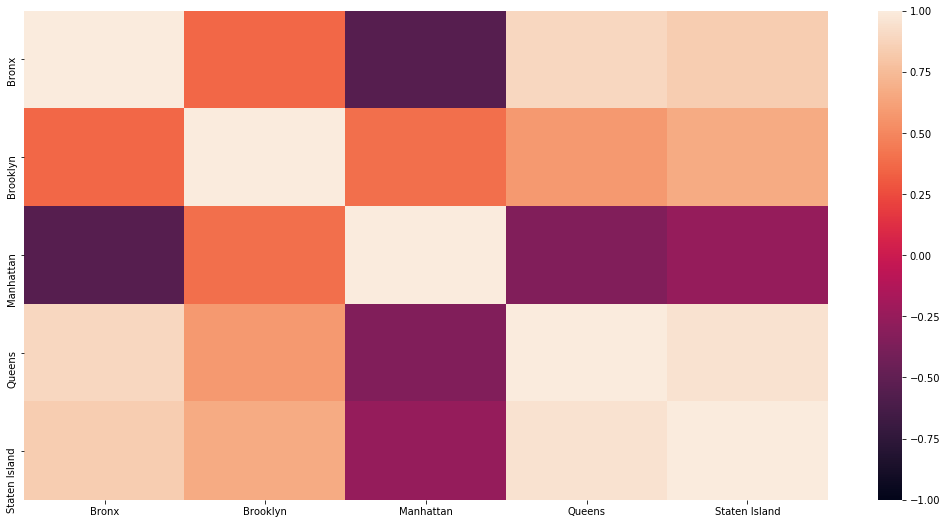

In [5]:
sns.heatmap(quarter_rent_correlation, vmin=-1, vmax=1)

In [6]:
# Calculate the correlation between sales prices across boroughs
quarter_sale_correlation=quarter_sale_df.corr()
quarter_sale_correlation

# Sale prices in Manhattan are negatively corrolated to sale prices in the Bronx and Staten Island 
# Sale prices in Queens and Staten Island are highly corrolated
# Sale prices in Brooklyn are corrolated to sale prices in Queens and Staten Island 

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Bronx,1.000000,-0.326022,-0.225234,-0.409538,-0.396620
Brooklyn,-0.326022,1.000000,0.094083,0.566242,0.517726
Manhattan,-0.225234,0.094083,1.000000,0.165039,-0.054230
Queens,-0.409538,0.566242,0.165039,1.000000,0.754922
Staten Island,-0.396620,0.517726,-0.054230,0.754922,1.000000


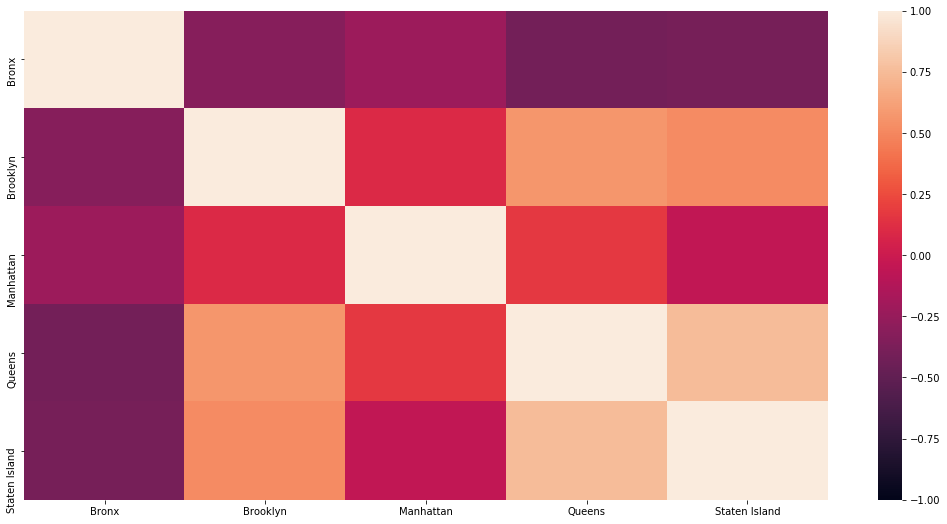

In [7]:
sns.heatmap(quarter_sale_correlation, vmin=-1, vmax=1)

In [20]:
# Create a new database for Bronx rent and sales prices 
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_bronx=pd.DataFrame(index = index)
quarter_rent_sale_bronx['Bronx Rent']=quarter_rent_df['Bronx']
quarter_rent_sale_bronx['Bronx Sale']=quarter_sale_df['Bronx']
quarter_rent_sale_bronx

,Bronx Rent,Bronx Sale
2015-Q1,1495.754941,7.936697e+05
2015-Q2,1499.579710,1.132875e+06
2015-Q3,1524.159420,6.372525e+05
2015-Q4,1561.304348,8.069360e+05
2016-Q1,1587.463768,9.134569e+05
2016-Q2,1591.536232,6.769483e+05
2016-Q3,1616.876153,6.614433e+05
2016-Q4,1681.856522,7.621143e+05
2017-Q1,1708.661397,7.776927e+05
2017-Q2,1712.782609,7.223921e+05


In [21]:
# Determine if Bronx rent and sales prices are correlated 
correlation_rent_sale_bronx = quarter_rent_sale_bronx.corr()
correlation_rent_sale_bronx

,Bronx Rent,Bronx Sale
Bronx Rent,1.000000,-0.562914
Bronx Sale,-0.562914,1.000000


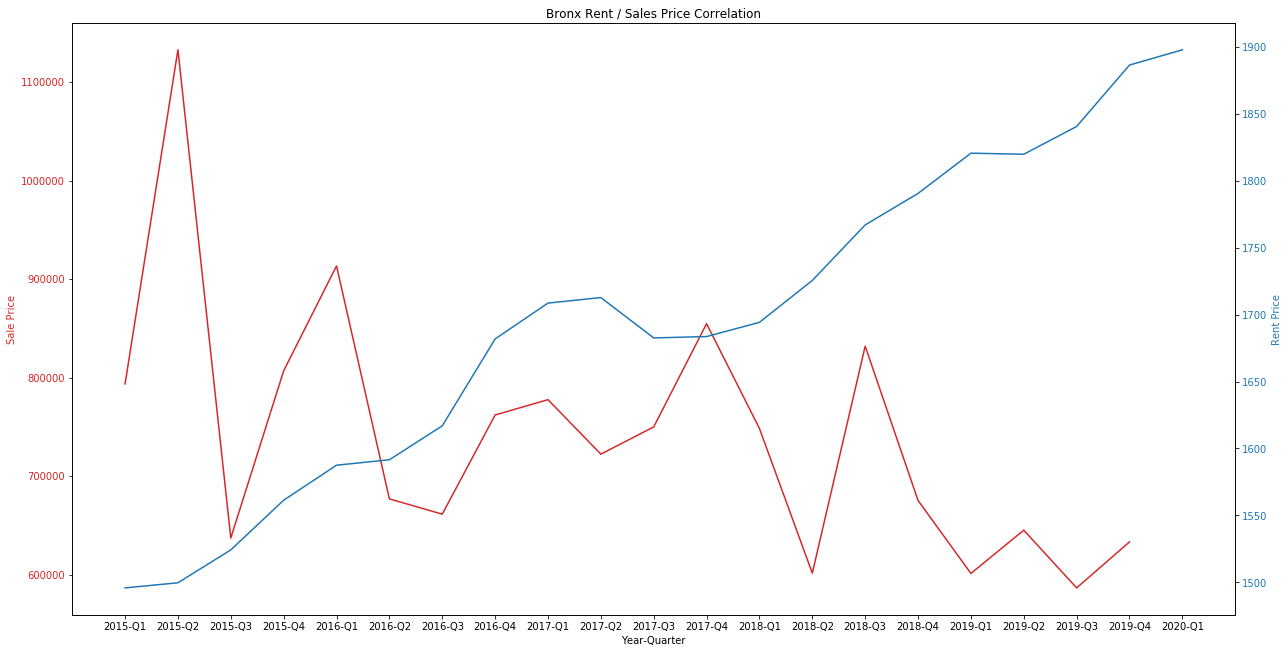

In [22]:
# Map Bronx rent and sales price correlation 
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_bronx.index, quarter_rent_sale_bronx['Bronx Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_bronx.index, quarter_rent_sale_bronx['Bronx Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Bronx Rent / Sales Price Correlation')
plt.show()

In [8]:
# Create a new database for Brooklyn rent and sales prices 
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_brooklyn=pd.DataFrame(index = index)
quarter_rent_sale_brooklyn['Brooklyn Rent']=quarter_rent_df['Brooklyn']
quarter_rent_sale_brooklyn['Brooklyn Sale']=quarter_sale_df['Brooklyn']
quarter_rent_sale_brooklyn

,Brooklyn Rent,Brooklyn Sale
2015-Q1,2183.284314,1.130284e+06
2015-Q2,2226.117647,9.258300e+05
2015-Q3,2316.440842,9.741481e+05
2015-Q4,2384.872549,9.692575e+05
2016-Q1,2388.568627,9.920667e+05
2016-Q2,2375.490196,9.757775e+05
2016-Q3,2389.627451,1.027944e+06
2016-Q4,2422.372549,1.018279e+06
2017-Q1,2394.774510,1.022893e+06
2017-Q2,2348.568925,1.027422e+06


In [9]:
# Determine if Brooklyn rent and sales prices are correlated 
correlation_rent_sale_brooklyn = quarter_rent_sale_brooklyn.corr()
correlation_rent_sale_brooklyn

,Brooklyn Rent,Brooklyn Sale
Brooklyn Rent,1.000000,-0.305198
Brooklyn Sale,-0.305198,1.000000


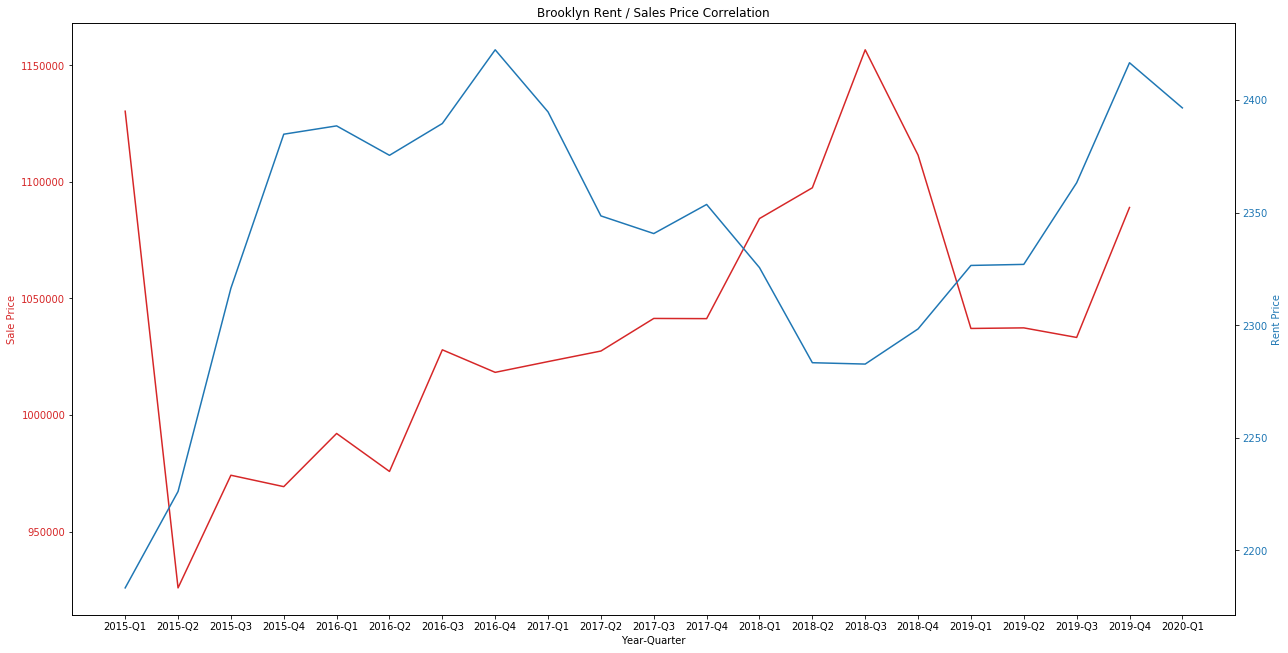

In [10]:
# Map Brooklyn rent and sales price correlation 
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_brooklyn.index, quarter_rent_sale_brooklyn['Brooklyn Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_brooklyn.index, quarter_rent_sale_brooklyn['Brooklyn Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Brooklyn Rent / Sales Price Correlation')
plt.show()

In [11]:
# Create a new database for Manhattan rent and sales prices
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_manhattan=pd.DataFrame(index = index)
quarter_rent_sale_manhattan['Manhattan Rent']=quarter_rent_df['Manhattan']
quarter_rent_sale_manhattan['Manhattan Sale']=quarter_sale_df['Manhattan']
quarter_rent_sale_manhattan

,Manhattan Rent,Manhattan Sale
2015-Q1,3565.471510,1.866549e+06
2015-Q2,3546.814282,1.785913e+06
2015-Q3,3393.259019,1.902829e+06
2015-Q4,3786.904551,1.756214e+06
2016-Q1,3892.253333,1.778926e+06
2016-Q2,3766.184930,2.174441e+06
2016-Q3,3794.189683,1.938502e+06
2016-Q4,3817.956349,2.065984e+06
2017-Q1,3584.146825,1.863706e+06
2017-Q2,3653.159431,1.837731e+06


In [12]:
# Determine if Manhattan rent and sales prices are correlated 
correlation_rent_sale_manhattan = quarter_rent_sale_manhattan.corr()
correlation_rent_sale_manhattan

,Manhattan Rent,Manhattan Sale
Manhattan Rent,1.000000,0.014434
Manhattan Sale,0.014434,1.000000


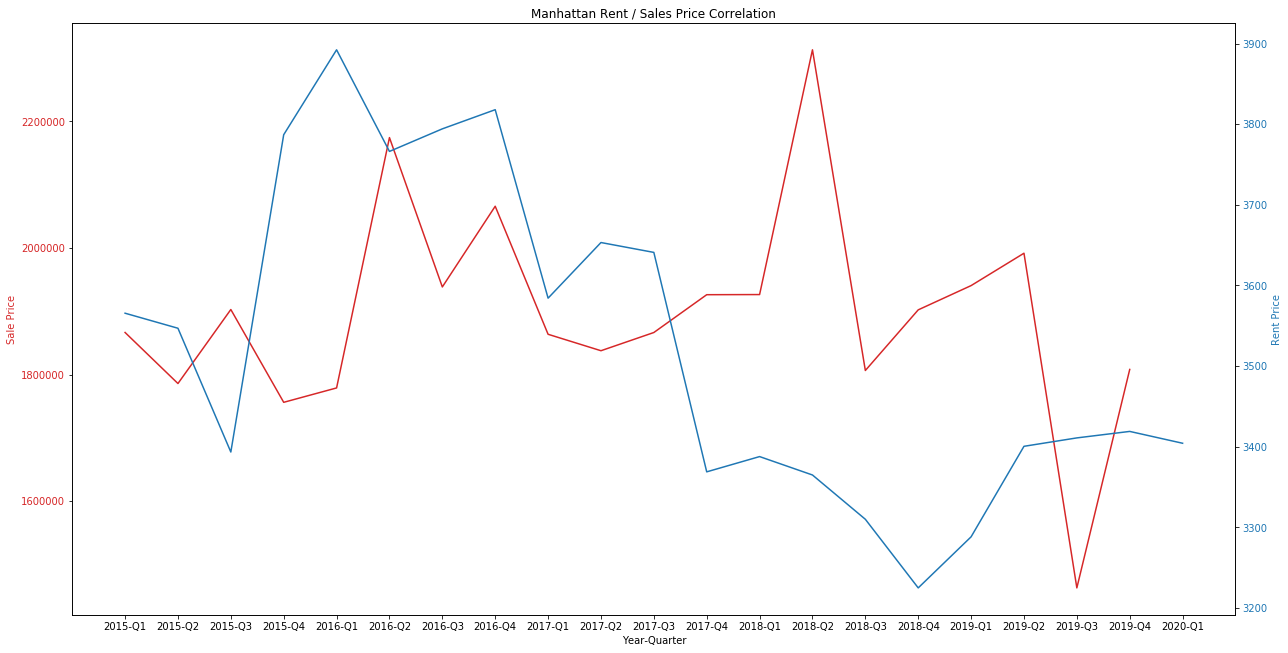

In [13]:
# Map Brooklyn rent and sales price correlation
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_manhattan.index, quarter_rent_sale_manhattan['Manhattan Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_manhattan.index, quarter_rent_sale_manhattan['Manhattan Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Manhattan Rent / Sales Price Correlation')
plt.show()


In [14]:
# Create a new database for Queens rent and sales prices
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_queens=pd.DataFrame(index = index)
quarter_rent_sale_queens['Queens Rent']=quarter_rent_df['Queens']
quarter_rent_sale_queens['Queens Sale']=quarter_sale_df['Queens']
quarter_rent_sale_queens

,Queens Rent,Queens Sale
2015-Q1,1890.415205,535577.169492
2015-Q2,1934.654971,572124.844243
2015-Q3,2000.231099,557428.864407
2015-Q4,2049.690058,611727.891974
2016-Q1,2065.175439,585771.847458
2016-Q2,2076.321637,585371.355932
2016-Q3,2092.292398,625813.118644
2016-Q4,2117.192982,636082.739529
2017-Q1,2123.643275,602400.525424
2017-Q2,2108.695906,691745.971751


In [15]:
# Determine if Queens rent and sales prices are correlated 
correlation_rent_sale_queens = quarter_rent_sale_queens.corr()
correlation_rent_sale_queens

,Queens Rent,Queens Sale
Queens Rent,1.000000,0.742756
Queens Sale,0.742756,1.000000


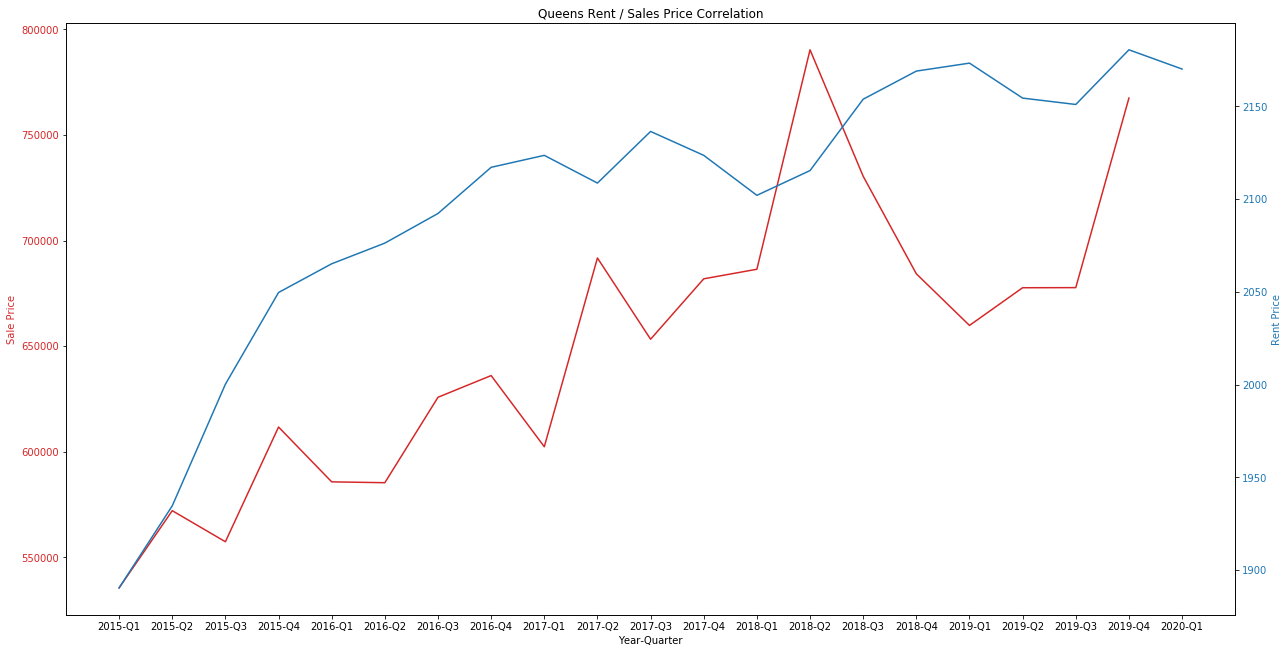

In [16]:
# Map Queens rent and sales price correlation
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_queens.index, quarter_rent_sale_queens['Queens Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_queens.index, quarter_rent_sale_queens['Queens Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Queens Rent / Sales Price Correlation')
plt.show()

In [17]:
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_statenisland=pd.DataFrame(index = index)
quarter_rent_sale_statenisland['Staten Island Rent']=quarter_rent_df['Staten Island']
quarter_rent_sale_statenisland['Staten Island Sale']=quarter_sale_df['Staten Island']
quarter_rent_sale_statenisland

,Staten Island Rent,Staten Island Sale
2015-Q1,1537.305556,433772.444444
2015-Q2,1606.222222,430735.111111
2015-Q3,1709.625000,432843.194444
2015-Q4,1878.777778,432944.777778
2016-Q1,1879.700000,438420.027778
2016-Q2,1852.885185,434230.083333
2016-Q3,1907.328571,475787.055556
2016-Q4,1962.731481,488450.833333
2017-Q1,1904.018687,483276.166667
2017-Q2,1859.305556,527237.555556


In [18]:
correlation_rent_sale_statenisland = quarter_rent_sale_statenisland.corr()
correlation_rent_sale_statenisland

,Staten Island Rent,Staten Island Sale
Staten Island Rent,1.000000,0.704001
Staten Island Sale,0.704001,1.000000


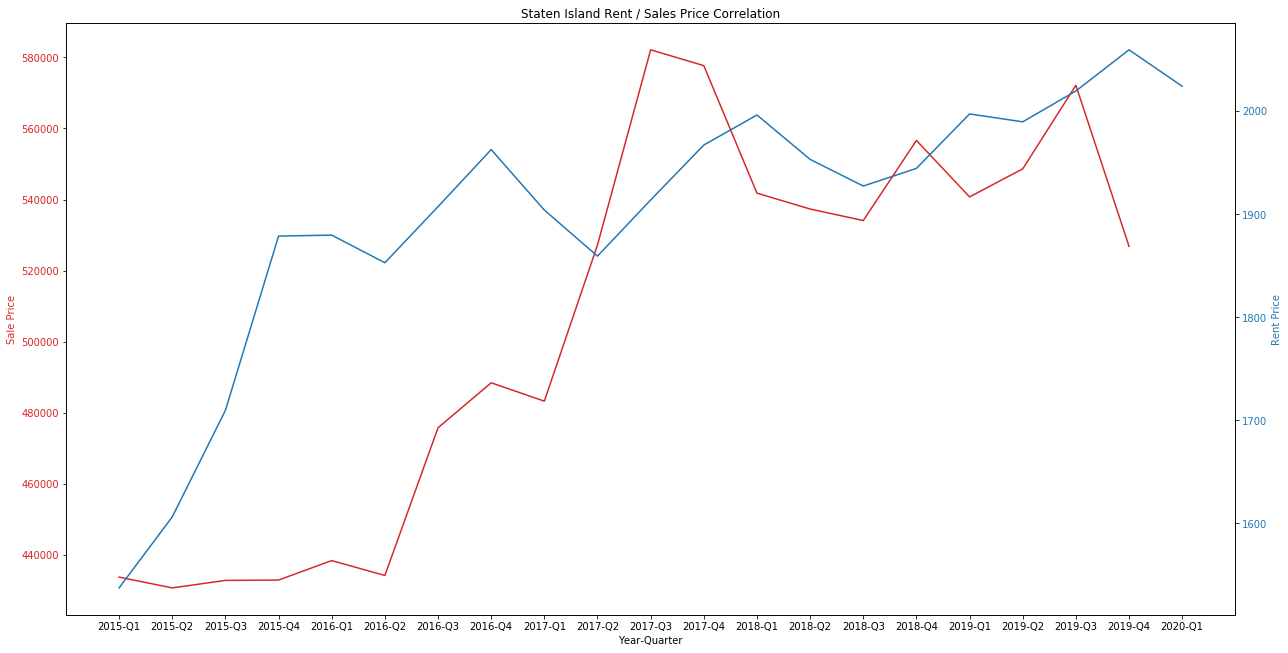

In [19]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_statenisland.index, quarter_rent_sale_statenisland['Staten Island Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_statenisland.index, quarter_rent_sale_statenisland['Staten Island Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Staten Island Rent / Sales Price Correlation')
plt.show()